In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Read in the dataset
file_path = Path("./Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#Prepare data by dropping Myopic from the dataset
x = df.drop("MYOPIC", axis=1) 
x.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


# Standardize data set to prevent large values from influencing the outcome


# PCA 

In [5]:
# Initialize PCA model
pca = PCA(n_components=3)
# Get two principal components for the data.
myopia_pca = pca.fit_transform(x)

In [6]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2","principal component 3"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501


In [7]:
pca.explained_variance_ratio_

array([0.72557249, 0.16081428, 0.07227215])

# t - SNE

# K Means

In [23]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_myopia_pca)

KMeans(n_clusters=3, random_state=1)

In [24]:
# Get predictions
predictions = model.predict(df_myopia_pca)
print(predictions)

[0 1 1 0 1 0 0 1 1 0 2 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 1 1 1 1 2 0 0 1 2 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 2 0 1 1 0 1 2 1 2 0
 1 0 1 2 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 2 0 1 0 0 0 1 0 0 2 0 1 0 1 1 2
 1 1 1 1 1 0 1 1 0 1 0 1 1 2 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0
 1 2 1 1 2 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 2 1 1 0 2 1 1 1 1 1 0 1 0 2 1 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 2 1 0 0 1 0 2 1 1 0 1 0
 2 1 1 2 2 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 2 1 0 0 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 2 0 1 2 0 2 1 1 1 0 1 0 1 1 0 1 2 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 2 0 0 0 0 0 2 1 1 1 1 0 1 0 0 0 1 2 1 1 1 0 1 0 1 1 1 1 0 2 0 0 0
 2 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 2 1 1 0 0 0 2 1 1 1 1 0 1 2 0 2 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 2 1 1 0 1 0 1 2 1 1 2 1 1 1 1 0 1
 1 1 2 1 1 1 0 1 2 0 1 1 

In [25]:
# Add a new class column to df_iris
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,12.138059,31.636212,-4.526625,0
1,-15.268363,-6.095695,1.207074,1
2,-11.662239,3.755105,2.808212,1
3,11.235886,4.012566,-8.179565,0
4,-22.446506,4.580916,-1.817501,1


C:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



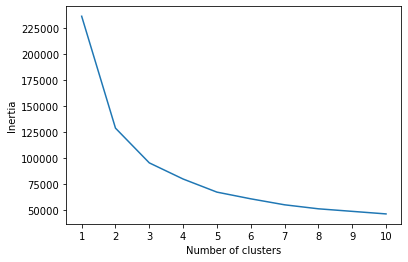

In [26]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["CLASS"] = model.labels_

    return data

In [18]:
clusters = get_clusters(5, x)
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class,CLASS
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,4,3
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,4
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,4
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,2
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1,2
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0,4
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0,4
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,2,0


In [28]:
import plotly.express as px
fig = px.scatter_3d(
    df_myopia_pca,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [33]:
def show_clusters(df):
    plt.scatter(df['SPHEQ'], df['AL'], c=df['class'])
    plt.xlabel('Frozen')
    plt.ylabel('Grocery')
    plt.show()

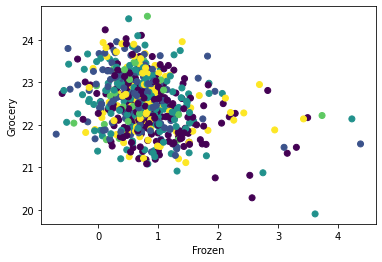

In [34]:
show_clusters(clusters)